<a href="https://colab.research.google.com/github/leemutai/Intro_to_datascience/blob/main/neuralwithkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
#converting csv data into arrays
dataset = df.values
#we then type dataset to see what is in the values, in an array form
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [10]:
#splitting data into input features
X = dataset[:,0:10]
#assigning the last array to Y
Y = dataset[:,10]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
#lets split the data into training and test set
from sklearn.model_selection import train_test_split
#now lets split the data
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#splitting the data for validation and test set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#checking the dimensions for train, test and validate





In [22]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [25]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3014 - accuracy: 0.8816 - val_loss: 0.2759 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3007 - accuracy: 0.8816 - val_loss: 0.2746 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8845 - val_loss: 0.2737 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.8806 - val_loss: 0.2726 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8787 - val_loss: 0.2717 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8826 - val_loss: 0.2707 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 0.8836 - val_loss: 0.2698 - val_accuracy: 0.8767
Epoch 8/100
3

In [28]:
from google.colab import files
uploaded = files.upload()

In [30]:
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9087


0.9086757898330688

In [31]:
import matplotlib.pyplot as plt


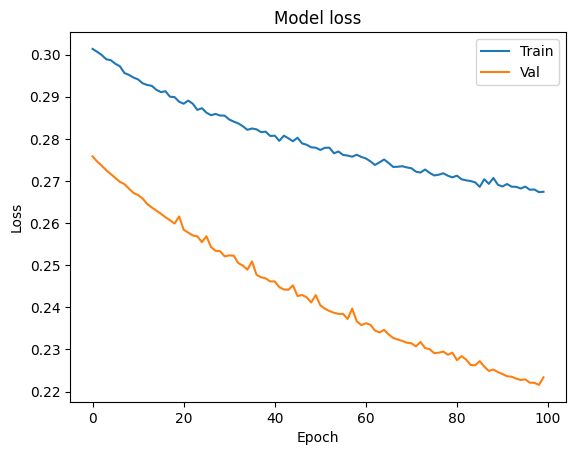

In [33]:
#isualize the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

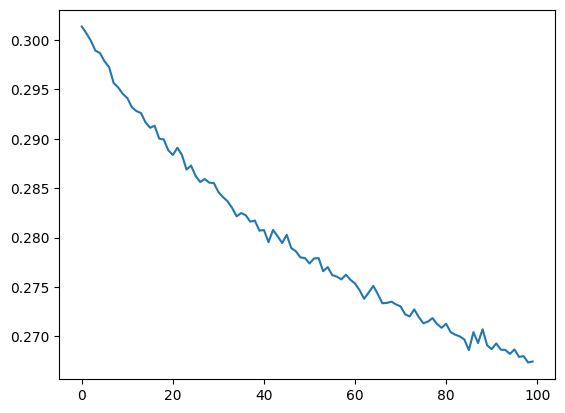

In [34]:
plt.plot(hist.history['loss'])

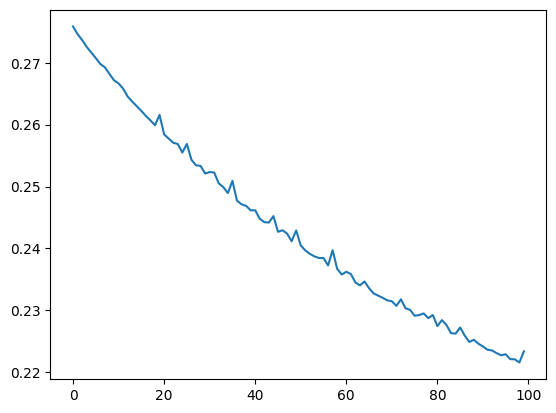

In [35]:
plt.plot(hist.history['val_loss'])


Text(0.5, 1.0, 'Model loss')

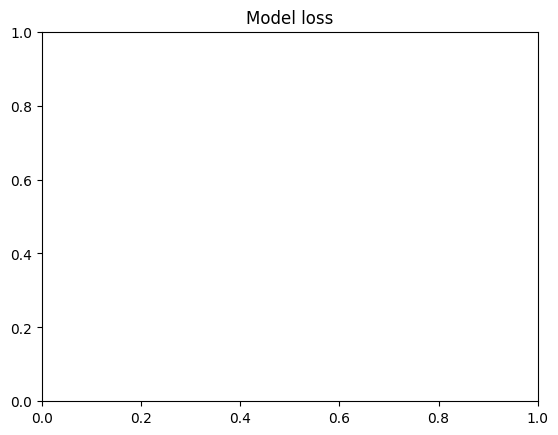

In [36]:
plt.title('Model loss')


Text(0, 0.5, 'Loss')

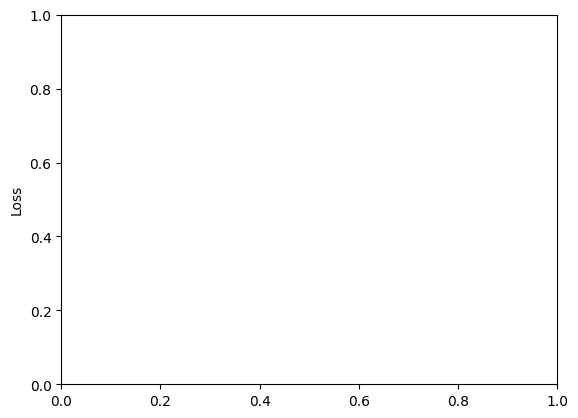

In [37]:
plt.ylabel('Loss')


Text(0.5, 0, 'Epoch')

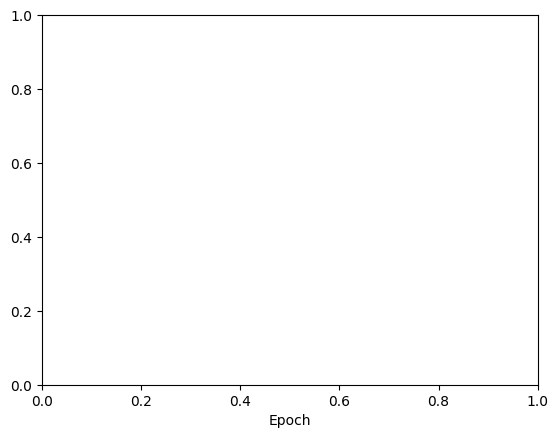

In [38]:
plt.xlabel('Epoch')


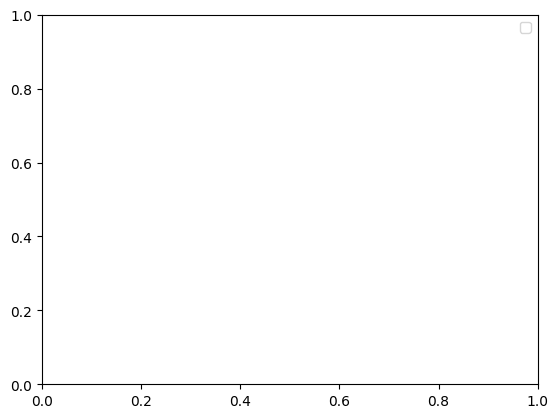

In [39]:
plt.legend(['Train', 'Val'], loc='upper right')


In [41]:
plt.show()


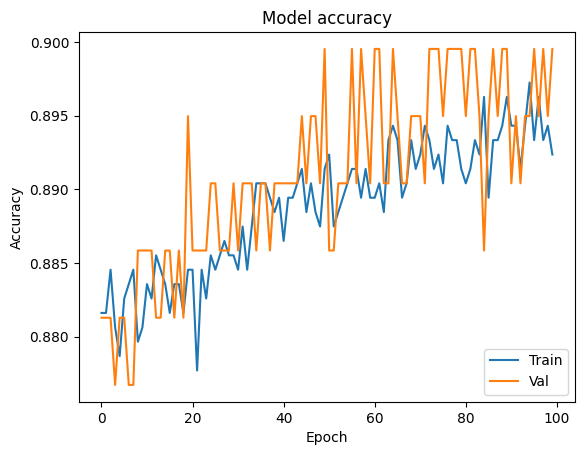

In [44]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [45]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 87ms/step - loss: 0.4667 - accuracy: 0.7886 - val_loss: 0.3680 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 2s 58ms/step - loss: 0.3500 - accuracy: 0.8669 - val_loss: 0.3830 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 2s 75ms/step - loss: 0.3378 - accuracy: 0.8464 - val_loss: 0.2872 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 3s 95ms/step - loss: 0.3019 - accuracy: 0.8738 - val_loss: 0.2590 - val_accuracy: 0.9132
Epoch 5/100
32/32 [==============================] - 4s 123ms/step - loss: 0.3070 - accuracy: 0.8708 - val_loss: 0.2622 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 4s 115ms/step - loss: 0.2739 - accuracy: 0.8865 - val_loss: 0.2675 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 3s 97ms/step - loss: 0.2800 - accuracy: 0.8806 - val_loss: 0.2880 - val_accuracy: 0.8858
Epoc

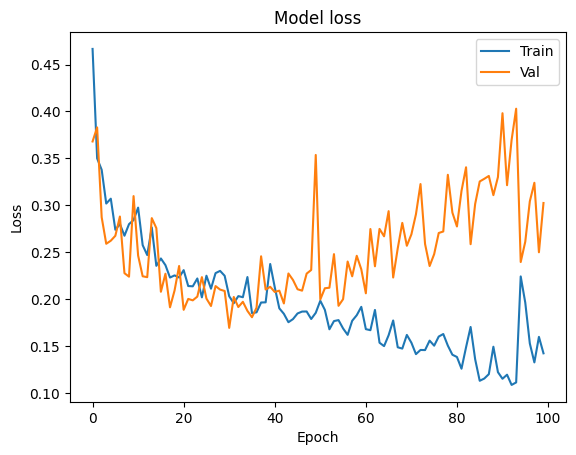

In [46]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

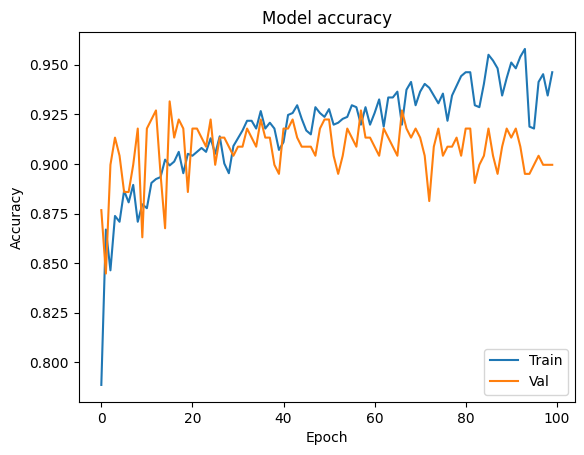

In [48]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [49]:
from keras.layers import Dropout
from keras import regularizers

In [50]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [51]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 89ms/step - loss: 14.2225 - accuracy: 0.6614 - val_loss: 3.8697 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 3s 83ms/step - loss: 1.6653 - accuracy: 0.8434 - val_loss: 0.6592 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 2s 64ms/step - loss: 0.5837 - accuracy: 0.8395 - val_loss: 0.5330 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 2s 68ms/step - loss: 0.5554 - accuracy: 0.8415 - val_loss: 0.4846 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 2s 66ms/step - loss: 0.4958 - accuracy: 0.8650 - val_loss: 0.4543 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 2s 70ms/step - loss: 0.5136 - accuracy: 0.8562 - val_loss: 0.4682 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 3s 86ms/step - loss: 0.4944 - accuracy: 0.8562 - val_loss: 0.4637 - val_accuracy: 0.8584
Epoch

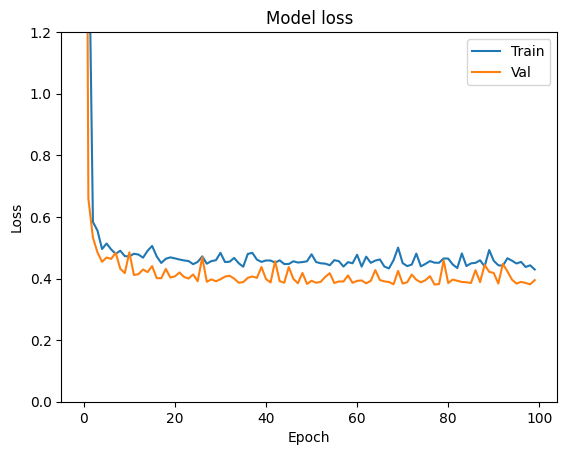

In [52]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

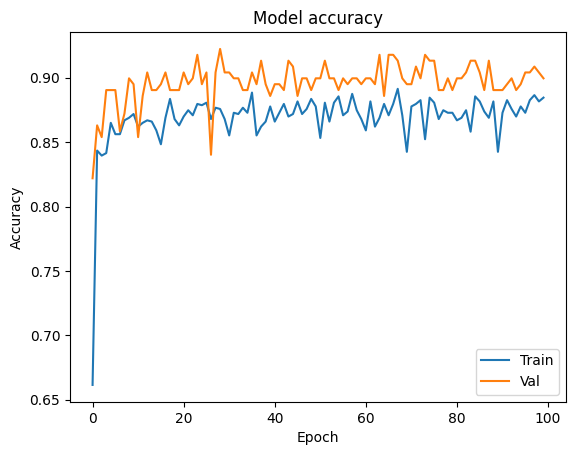

In [54]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()